# Heart Disease
## Context
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is represented by a binary value: 0 (no disease) and 1 (presence of disease).

## Content

Attribute Information:
1. **age**
2. **sex**
3. **cp**: chest pain type (4 values)
4. **trestbps**:resting blood pressure
5. **chol**:serum cholesterol in mg/dl
6. **fbs**:fasting blood sugar > 120 mg/dl
7. **restecg**:resting electrocardiographic results (values 0,1,2)
8. **thalach**:maximum heart rate achieved
9. **exang**:exercise induced angina
10. **oldpeak** = ST depression induced by exercise relative to rest
11. **slope**:the slope of the peak exercise ST segment
12. **ca**:number of major vessels (0-3) colored by fluorosopy
13. **thal**: 1 = normal; 2 = fixed defect; 3 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.



## Acknowledgements
Creators:
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Donor: David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

# Get the data
#### Create kaggle folder and import json


In [0]:
!mkdir -p ~/.kaggle
!echo '{"username":"user","key":"key"}' > /root/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


#### Download kaggle dataset


In [0]:
!kaggle datasets download ronitf/heart-disease-uci

  0% 0.00/3.40k [00:00<?, ?B/s]
100% 3.40k/3.40k [00:00<00:00, 2.93MB/s]


#### Move to directory and unzip files


In [0]:
!unzip heart-disease-uci.zip

Archive:  heart-disease-uci.zip
  inflating: heart.csv               


In [0]:
!rm *.zip

# Load libraries

In [0]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
import pandas as pd
import numpy as np

# Preliminary exploratory data analysis

load into pandas dataframe and have a quick look at the data

In [0]:
df = pd.read_csv('heart.csv')
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [0]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Check for missing data

no missing data

In [0]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Check data type
All attributes are integers or floats. The dataset can be used as is. No pre-processing is required

In [0]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### Split the data into train and test

Now split the dataset into a training set and a test set.

We will use the test set in the final evaluation of our model.

In [0]:
train_dataset = df.sample(frac=0.8,random_state=0)
test_dataset = df.drop(train_dataset.index)

### Inspect the data

Have a quick look at the joint distribution of a few pairs of columns from the training set.

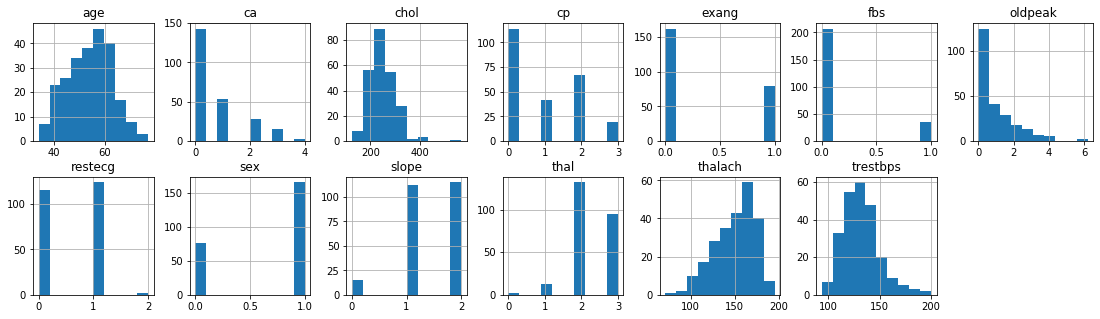

In [0]:
train_dataset.loc[:,train_dataset.columns != 'target'].hist(figsize=(19,5), layout=(2,7));

Also look at the overall statistics:

In [0]:
train_stats = train_dataset.describe()
train_stats.pop("target")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
age,242.0,54.128099,8.904992,34.0,48.0,54.5,60.75,77.0
sex,242.0,0.685950,0.465098,0.0,0.0,1.0,1.00,1.0
cp,242.0,0.962810,1.031989,0.0,0.0,1.0,2.00,3.0
trestbps,242.0,131.396694,17.352331,94.0,120.0,130.0,140.00,200.0
chol,242.0,247.181818,51.235037,126.0,212.0,241.5,274.00,564.0
fbs,242.0,0.144628,0.352454,0.0,0.0,0.0,0.00,1.0
restecg,242.0,0.528926,0.516522,0.0,0.0,1.0,1.00,2.0
thalach,242.0,149.797521,22.935873,71.0,134.5,153.0,167.75,195.0
exang,242.0,0.330579,0.471396,0.0,0.0,0.0,1.00,1.0
oldpeak,242.0,0.991322,1.162148,0.0,0.0,0.6,1.60,6.2


In [0]:
def quick_plot(x,y,z):
  groups=train_dataset.groupby(by=z)
  fig, ax = plt.subplots()
  for name, group in groups:
      ax.plot(group[x], group[y], marker='.', linestyle='', ms=12, label=name)
  ax.legend()
  ax.grid()
  plt.xlabel(x);
  plt.ylabel(y);
def plot_hist(var):
  plt.figure()
  train_dataset.groupby(by='target')[var].hist(alpha=.5);
  plt.legend(['heart disease','healthy']);
  plt.xlabel(var.capitalize());
  plt.ylabel('Number of occurences');

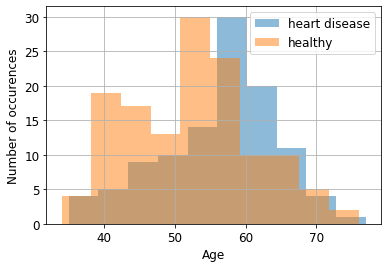

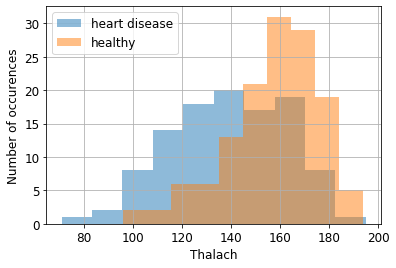

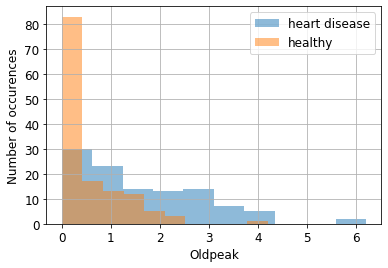

In [0]:
plot_hist('age')
plot_hist('thalach')
plot_hist('oldpeak')

### Split features from labels

Separate the target value, or "label", from the features. This label is the value that you will train the model to predict.

In [0]:
train_labels = train_dataset.pop('target')
test_labels = test_dataset.pop('target')

### Normalize the data

In [0]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

# Forecasting model for classification problem

### Build the model

Let's build our model. We will compare the accuracy on the testing set of different classifiers from sckit-learn library.

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

The classifiers used and compared are presented below.

In [0]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

## Comparison of classifiers
The results in terms of accuracy on the testing set are presented below. The three best performing classifiers are the Linear SVM, Gaussian process and Neural net with an accuracy of 85.2%.

In [0]:
results=pd.DataFrame(columns=names,index=['score','main_attr','train_score'])
for name, clf in zip(names, classifiers):
  clf.fit(normed_train_data, train_labels)
  results.loc['train_score',name]=clf.score(normed_train_data, train_labels)
  results.loc['score',name]=clf.score(normed_test_data, test_labels)
  if hasattr(clf, "feature_importances_"):
    results.loc['main_attr',name]=normed_train_data.columns[clf.feature_importances_>0]
  else:
    results.loc['main_attr',name]=np.nan
#results.transpose().sort_values(by='score',ascending=False)
results.loc['score',:].sort_values(ascending=False)

Neural Net           0.852459
Gaussian Process     0.852459
Linear SVM           0.852459
Naive Bayes          0.819672
AdaBoost             0.819672
Random Forest        0.819672
Nearest Neighbors    0.819672
Decision Tree        0.770492
QDA                  0.754098
RBF SVM               0.52459
Name: score, dtype: object

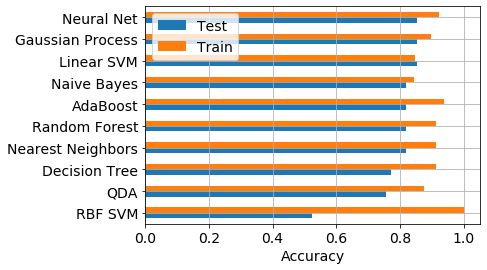

In [0]:
results.loc[['score','train_score'],:].transpose().sort_values(by='score').plot.barh();
plt.xlabel('Accuracy');
plt.grid();
plt.legend(['Test','Train'],loc='upper left');

## Main features
Identification and Analysis of the most important features. 

In [0]:
ft_imp=pd.DataFrame(columns=normed_test_data.columns,index=['coef'])
clf=AdaBoostClassifier()
clf.fit(normed_train_data, train_labels)
for i,j in zip(normed_test_data.columns,clf.feature_importances_):
  ft_imp[i]=j
ft_imp.transpose().sort_values(by='coef',ascending=False).head(6)

,coef
oldpeak,0.16
age,0.14
chol,0.14
trestbps,0.12
thalach,0.10
ca,0.10


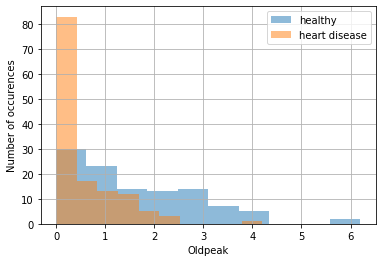

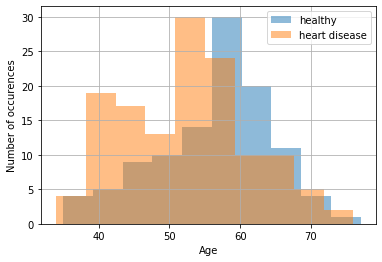

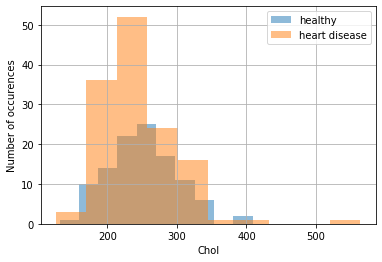

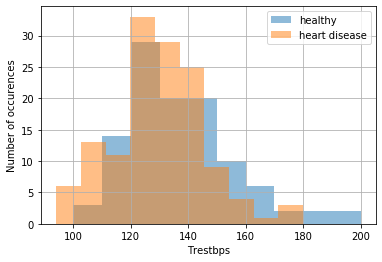

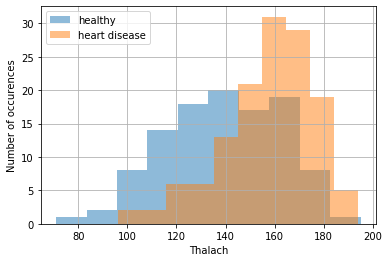

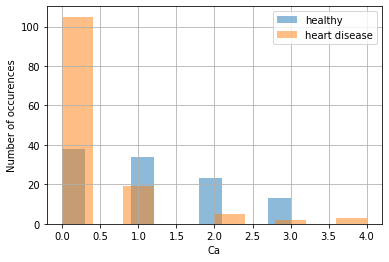

In [0]:
plot_hist('oldpeak')
plot_hist('age')
plot_hist('chol')
plot_hist('trestbps')
plot_hist('thalach')
plot_hist('ca')

In [0]:
def sh_boxplot(ft,trange):
  plt.figure(figsize=(12,9))
  plt.subplot(2,1,1)
  train_dataset.loc[train_dataset.target==0,ft].boxplot(vert=False,showmeans=True);
  plt.xticks(trange)
  plt.title('Healthy');
  plt.subplot(2,1,2)
  train_dataset.loc[train_dataset.target==1,ft].boxplot(vert=False,showmeans=True);
  plt.xticks(trange)
  plt.title('Heart disease');

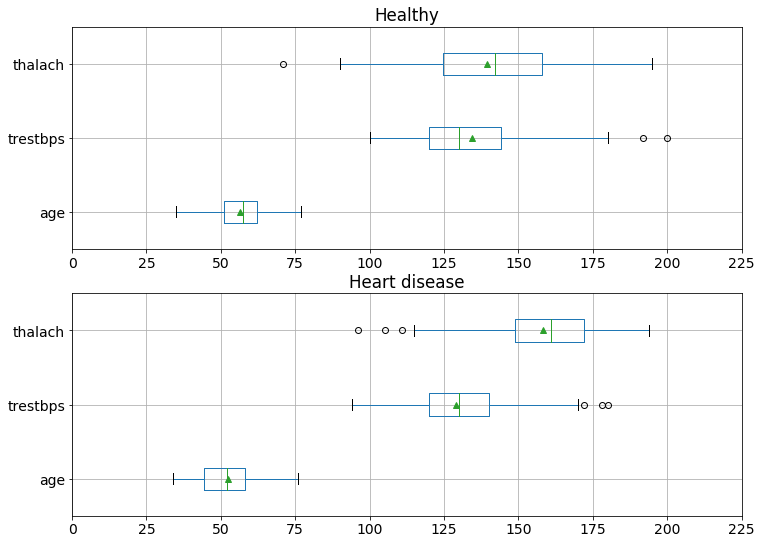

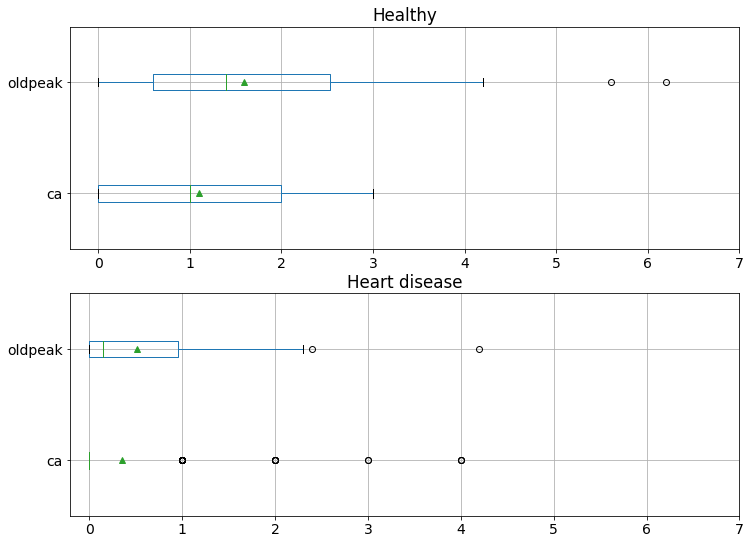

In [0]:
sh_boxplot(['age','trestbps','thalach'],range(0,230,25))
sh_boxplot(['ca','oldpeak'],range(0,8))

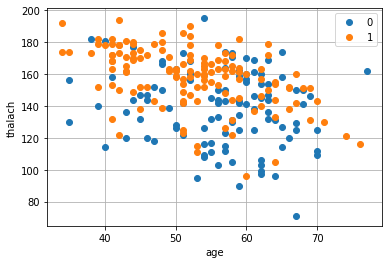

In [0]:
quick_plot('age','thalach','target')